## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [2]:
%reload_ext autoreload
%autoreload 2

Run id 92, Итог: -0.3, Записей: 5


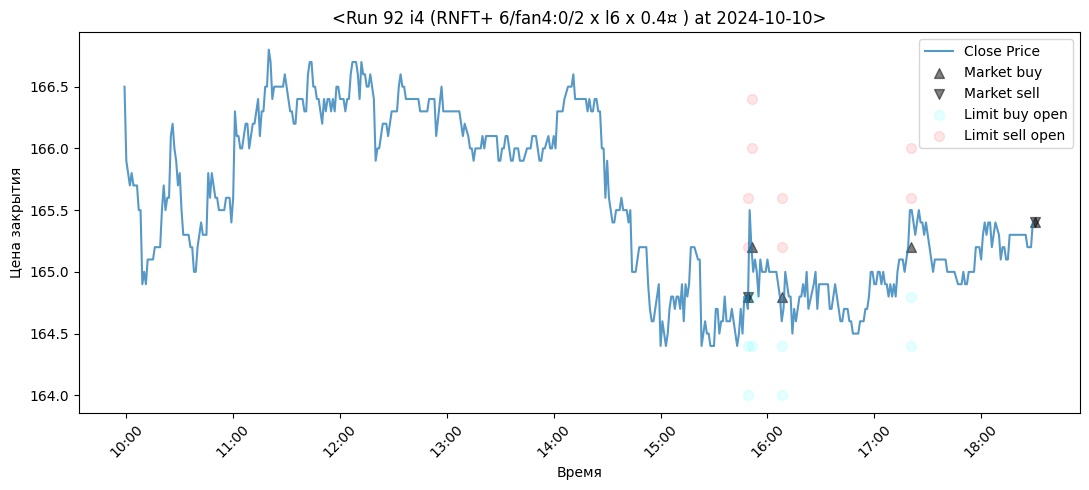


День: 2024-10-10, 'тестовый', Итог: 16.2
{'profit': 16.2, 'profit_p': 0.14, 'profit_p_avg': 0.14, 'config': RNFT+ 6/fan4:1/2 x l6 x 0.4¤ , 'last_conf': RNFT+ 6/fan4:1/2 x l6 x 0.4¤ , 'op': 37}


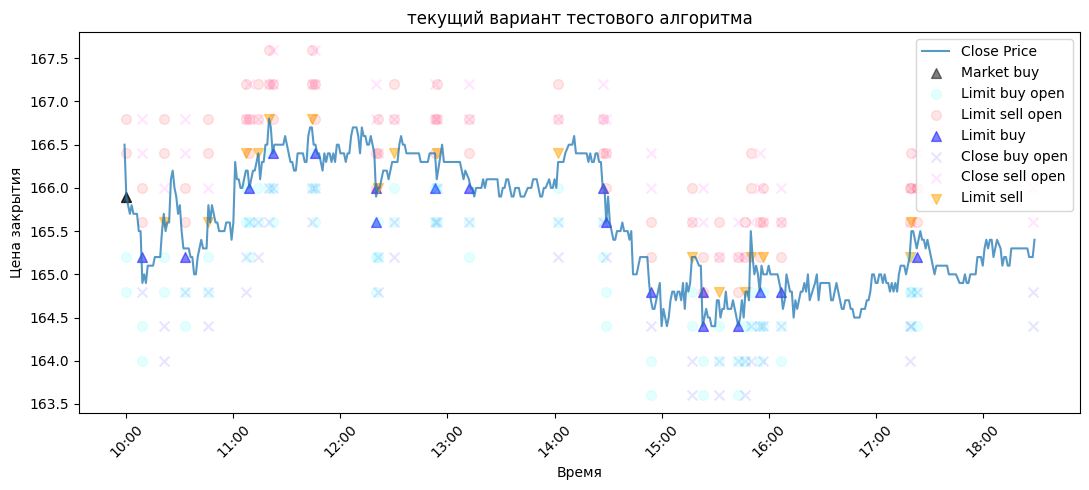

In [3]:
from app import create_app
from app.models import Order, Run
from app.helper import LocalCache
from app.config import RunConfig
from bot import TestAlgorithm
from datetime import datetime
from app.plot import PlotRun

LocalCache.clear()

config = RunConfig.from_repr_string('RNFT+ 6/fan4:1/2 x l6 x 0.4¤')
date = '2024-10-10'
# date = None
if date is None:
    date = datetime.now().strftime('%Y-%m-%d')

def show_test_alg():
    
    test_alg = TestAlgorithm(
        do_printing=False,
        config=config
    )

    result = test_alg.test(
        last_test_date = date,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
        shares_count=0,
    )
    
    print()
    print(f"День: {date}, 'тестовый', Итог: {result['profit']}"
          # f", Записей: {result['op_cnt']}"
          )
    print(result)

    PlotRun.draw_notebook(
        config.ticker,
        date,
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

# выводим результаты за этот день
app = create_app()
with app.app_context():
    runs = Run.get_by_date_and_ticker(date, config.ticker)
    for run in runs:
        print(f"Run id {run.id}, "
              f"Итог: {run.total}, "
              f"Записей: {run.operations_cnt}")
        PlotRun.draw_notebook(
            config.ticker,
            date,
            Order.get_by_run_id(run.id),
            f"{run}"
        )

# выводим результаты тестового алгоритма
show_test_alg()
